In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(r'datasets\car_evaluation.csv', names=column_names, header=None)

In [5]:
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\nEncoded Data Sample:")
print(df.head())


Encoded Data Sample:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

(1382, 6)
(1382,)


In [20]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 346 points : 9


In [25]:
print("\n✅ Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['class'].classes_))


✅ Model Evaluation:
Accuracy: 97.40%

Classification Report:
              precision    recall  f1-score   support

         acc       0.99      0.90      0.94        83
        good       0.65      1.00      0.79        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



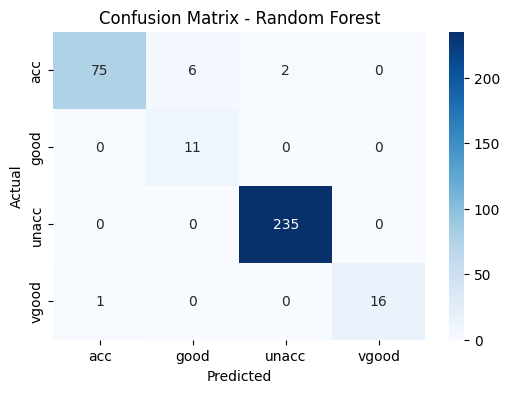

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoders['class'].classes_,
            yticklabels=label_encoders['class'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Feature Importances:
    Feature  Importance
5    safety    0.276100
3   persons    0.218374
0    buying    0.190115
1     maint    0.162154
4  lug_boot    0.085626
2     doors    0.067631


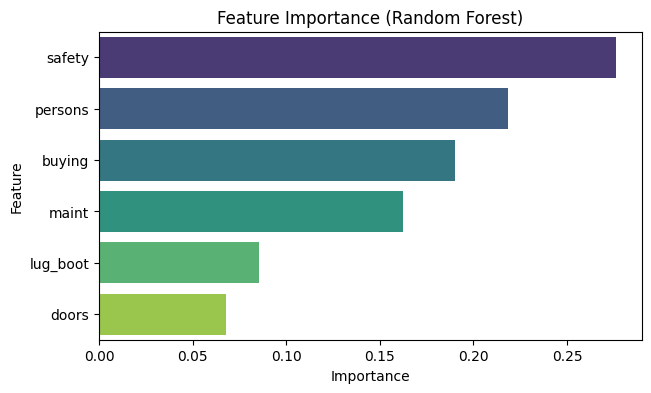

In [29]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=feature_importances,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette="viridis",
    legend=False
)
plt.title("Feature Importance (Random Forest)")
plt.show()